# 論理生命学最終課題(3番を選択)

- 手法:いくつかのクラスを定義して実装した
  - マップの状態(start, wall, goal)とエージェントの座標を管理するGridWorldクラス
  - 状態価値関数を用いるエージェントのクラスであるVLearningAgent
  - 行動価値関数を用いるエージェントのクラスであるQLearningAgent
- 結果と考察は以降の2.学習と結果で記述してある

## 1. 各クラスの定義

- エージェントの位置とマップを管理するGridWorldクラスを定義 

In [444]:
import copy

class GridWorld:
    def __init__(self, map):
        self.filed_type = { #dict 
            "N": 0,  # 通常
            "G": 1,  # ゴール
            "W": 2,  # 壁
        }
        self.actions = { #dict
            "UP": 0,
            "DOWN": 1,
            "LEFT": 2,
            "RIGHT": 3
        }
        self.map = map
        self.start_pos = (0, 0)   # エージェントのスタート地点(x, y) ()なしでもタプルと判定される
        self.agent_pos = copy.deepcopy(self.start_pos)  # エージェントがいる地点

    def step(self, action): #step関数が呼ばれた時点でactinonは[UP,DOWN, LEFT, RIGHT]のいずれかを指定済み
        """
            行動の実行
            状態, 報酬、ゴールしたかを返却
        """
        to_x, to_y = copy.deepcopy(self.agent_pos) #現在座標

        # 移動可能かどうかの確認。移動不可能であれば、ポジションはそのままにマイナス報酬
        if self._is_possible_action(to_x, to_y, action) == False:
            return self.agent_pos, None, False #報酬はNone.これはmain側でNoneなら壁である判定をさせる

        if action == self.actions["UP"]:
            to_y += -1
        elif action == self.actions["DOWN"]:
            to_y += 1
        elif action == self.actions["LEFT"]:
            to_x += -1
        elif action == self.actions["RIGHT"]:
            to_x += 1

        is_goal = self._is_end_episode(to_x, to_y) # エピソードの終了の確認
        reward = self._compute_reward(to_x, to_y)
        self.agent_pos = to_x, to_y #ここで座標変更(移動)
        return self.agent_pos, reward, is_goal #返すのは現在座標、即時報酬、ゴール判定

    def _is_end_episode(self, x, y):
        """
            x, yがエピソードの終了かの判定。
        """
        #x, yはマップの左上のマスを原点として右と下がそれぞれの正の方向なので配列で扱うときはxとyは逆になる
        if self.map[y][x] == self.filed_type["G"]:      # ゴール
            return True
        else:
            return False

    def _is_wall(self, x, y):
        """
            x, yが壁かどうかの確認
        """
        if self.map[y][x] == self.filed_type["W"]:
            return True
        else:
            return False

    def _is_possible_action(self, x, y, action):
        """
            実行可能な行動かどうかの判定
        """
        to_x = x
        to_y = y

        if action == self.actions["UP"]:
            to_y += -1
        elif action == self.actions["DOWN"]:
            to_y += 1
        elif action == self.actions["LEFT"]:
            to_x += -1
        elif action == self.actions["RIGHT"]:
            to_x += 1

        if len(self.map) <= to_y or 0 > to_y: #to_yが取りうる値は[0, 9]なのでそうでなければFalse
            return False
        elif len(self.map[0]) <= to_x or 0 > to_x: #to_xが取りうる値は[0, 9]なのでそうでなければFalse
            return False
        elif self._is_wall(to_x, to_y): #(to_x, to_y)が壁ならFalse
            return False

        return True
    
    def _is_possible_action_list(self):
        """
            実行可能な行動かどうかの判定
        """
        action_list = []
        to_list = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        for x, y in to_list:
            to_x = self.agent_pos[0]
            to_y = self.agent_pos[1]
            to_x += x
            to_y += y
            if len(self.map) <= to_y or 0 > to_y or len(self.map[0]) <= to_x or 0 > to_x: #to_yが取りうる値は[0, 9]なのでそうでなければFalse
                action_list.append(False)
            else:
                if(self._is_wall(to_x, to_y)):
                    action_list.append(False)
                else:
                    action_list.append(True)
        return action_list

    def _compute_reward(self, x, y):
        if self.map[y][x] == self.filed_type["N"]:
            return 0
        elif self.map[y][x] == self.filed_type["G"]:
            return 100

    def reset(self): #単にスタートポジションに戻す
        self.agent_pos = self.start_pos
        return self.start_pos

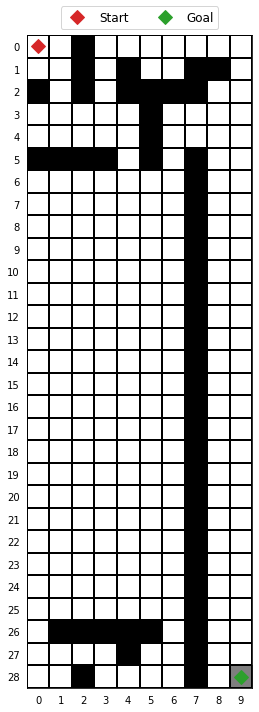

In [445]:
map = [[0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 2, 0, 2, 0, 0, 2, 2, 0],
                    [2, 0, 2, 0, 2, 2, 2, 2, 0, 0],
                    [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
                    [2, 2, 2, 2, 0, 2, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
                    [0, 2, 2, 2, 2, 2, 0, 2, 0, 0],
                    [0, 0, 0, 0, 2, 0, 0, 2, 0, 0],
                    [0, 0, 2, 0, 0, 0, 0, 2, 0, 1]]
grid_env = GridWorld(map)
maze = np.where(np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)) == 2, 1, np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)))
V_map = np.zeros(len(grid_env.map[0])*len(grid_env.map)).reshape(len(grid_env.map), len(grid_env.map[0]))

plt.figure(tight_layout=True)
im = plt.imshow(grid_env.map, aspect='equal', cmap="gray_r");
ax = plt.gca();
# Major ticks
ax.set_xticks(np.arange(0, len(maze[0]), 1));
ax.set_yticks(np.arange(0, len(maze), 1));
# Minor ticks
ax.set_xticks(np.arange(-.5, len(maze[0]), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(maze), 1), minor=True);
# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
start = grid_env.start_pos
goal = (np.where(np.array(grid_env.map) == 1.0)[0][0], np.where(np.array(grid_env.map) == 1.0)[1][0])
plt.plot(start[1], start[0], "D", color="tab:red", markersize=10)
plt.plot(goal[1], goal[0], "D", color="tab:green", markersize=10)
plt.plot([], [], "D", color="tab:red", markersize=10, label="Start")
plt.plot([], [], "D", color="tab:green", markersize=10, label="Goal")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), fontsize="large", ncol=2)

- V学習エージェントクラスの定義

In [446]:
import copy
import numpy as np
import random

class VLearningAgent:
    """
        V学習 エージェント
    """
    def __init__(
            self,
            alpha=.2,
            epsilon=.1,
            gamma=.99,
            actions=None,
            observation=None,
            grid_map=None):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.reward_history = [] #報酬の記録用
        self.actions = actions
        self.state = str(observation) #stateは(x, y)のタプル
        self.ini_state = str(observation)
        self.previous_state = None #とりあえずNoneで置いてるだけで、宣言部でGridWorldクラス内のstart.posが代入される
        self.previous_action = None
        self.v_values, self.map_size_x, self.map_size_y = self._init_v_values(grid_map)
        
    def _init_v_values(self, grid_map):
        """
           V テーブルの初期化
        """
        v_values = {} #dict型
        for x in range(len(grid_map[0])):
            for y in range(len(grid_map)):
                state = str((x, y))
                if(grid_map[y][x] == 2):
                    v_values[state] = np.nan
                else:
                    v_values[state] = 0.0
        return v_values, len(grid_map[0]), len(grid_map)

    def init_state(self):
        """
            状態の初期化
        """
        self.previous_state = copy.deepcopy(self.ini_state)
        self.state = copy.deepcopy(self.ini_state)
        return self.state

#    def act(self, state, action_list):
    def act(self, action_list):
        state = self.state.replace("(", "")
        state = state.replace(")", "")
        state = state.split(",")
        pos = []
        for i in state:
            pos.append(int(i))
        state_x = pos[0]
        state_y = pos[1]
        around_v_values = np.array([])
        to_list = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        # ε-greedy選択
        if np.random.uniform() < self.epsilon:  # np.random.uniform()は[0, 1]の間で一様乱数を出力. epsilonよりも小さければrandom行動
            action = np.random.randint(0, len(self.actions))
            while(not action_list[action]):
                action = np.random.randint(0, len(self.actions))

        else:   # greedy行動
            for index, capability in enumerate(action_list):
                if(capability):
                    x, y = to_list[index][0], to_list[index][1]
                    to_x = state_x + x
                    to_y = state_y + y
                    around_v_values = np.append(around_v_values, self.v_values[str((to_x, to_y))])
                else:
                    around_v_values = np.append(around_v_values, np.nan)
            index = np.where(around_v_values == np.nanmax(around_v_values))
            action = random.choice(index[0])
            
        self.previous_action = action #選択した行動を記録
        return action #その行動を返却

    def observe(self, next_state, reward=None):
        """
            次の状態と報酬の観測
        """
        next_state = str(next_state)

        self.previous_state = copy.deepcopy(self.state) #現在の状態を記録
        self.state = next_state #現在の状態にnext_stateを記録

        if reward is not None: #報酬があれば実行(ほとんどの環境設定でそうで今回もrewardは必ず返却される)
            self.reward_history.append(reward) #reword_historyに記録
            self.learn(reward)

    def learn(self, reward):
        """
            V値の更新
        """
        v = self.v_values[self.previous_state] #V(x, y)
        v_prime = self.v_values[self.state] #V(x', y')
        
        # V(x, y) <- V(x, y) + alpha * (r + gamma * V(x', y') - V(x, y))
        self.v_values[self.previous_state] = v + (self.alpha * (reward + (self.gamma * v_prime) - v))

- Q学習エージェントを定義

In [447]:
import copy
import numpy as np
import random

class QLearningAgent:
    """
        Q学習 エージェント
    """
    def __init__(
            self,
            alpha=.2,
            epsilon=.1,
            gamma=.99,
            actions=None,
            observation=None):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.reward_history = [] #報酬の記録用
        self.actions = actions
        self.state = str(observation) #stateは(x, y)のタプルを文字列型にしたもの
        self.ini_state = str(observation)
        self.previous_state = None #とりあえずNoneで置いてるだけで、宣言部でGridWorldクラス内のstart.posが代入される
        self.previous_action = None
        self.q_values = self._init_q_values() #q_values[self.state] = np.array([0(↑), 0(→), 1(↓), 0(←)])のような形で行動してたどり着いた状態が初めてである時に初めて追加される。最初は初期状態の行動価値以外記録されていない

    def _init_q_values(self):
        """
           Q テーブルの初期化
        """
        q_values = {} #dict型　q_values[self.state] = np.array([0(↑), 0(→), 1(↓), 0(←)])のように各座標に対してactionの数だけ値を持つ
        q_values[self.state] = np.repeat(0.0, len(self.actions)) #Q値は各座標における上下左右の移動の数(self.action)だけ必要。今回は初期状態のみ初期値0で埋める
        return q_values

    def init_state(self): #用意されてるけど使用されてないので不要
        """
            状態の初期化
        """
        self.previous_state = copy.deepcopy(self.ini_state)
        self.state = copy.deepcopy(self.ini_state)
        return self.state

    def act(self):
        # ε-greedy選択
        if np.random.uniform() < self.epsilon:  # np.random.uniform()は[0, 1]の間で一様乱数を出力. epsilonよりも小さければrandom行動
            action = np.random.randint(0, len(self.q_values[self.state])) #np.random.randiant()で[0, 4(各座標における選択可能な行動の数)]の整数を出力(行動選択)
            while(np.isnan(action)):
                action = np.random.randint(0, len(self.q_values[self.state]))
            
        else:   # greedy行動(最大の行動価値を持つ行動を選択)
            index = np.where(self.q_values[self.state] == np.nanmax(self.q_values[self.state]))
            action = random.choice(index[0])
           
        self.previous_action = action #選択した行動を記録
        return action #その行動を返却

    def observe(self, next_state, reward=None):
        """
            次の状態と報酬の観測
        """
        next_state = str(next_state)
        if next_state not in self.q_values:  # 始めて訪れる状態であれば行動価値を全て0で埋める
            self.q_values[next_state] = np.repeat(0.0, len(self.actions))

        self.previous_state = copy.deepcopy(self.state) #現在の状態を記録
        self.state = next_state #現在の状態にnext_stateを記録

        if reward is not None: #報酬があれば実行(ほとんどの環境設定でそうで今回もrewardは必ず返却される)
            self.reward_history.append(reward) #reword_historyに記録
            self.learn(reward)

    def learn(self, reward):
        """
            Q値の更新
        """
        q = self.q_values[self.previous_state][self.previous_action]  # Q(s, a) ##Q((0, 1), 0)
        max_q = np.nanmax(self.q_values[self.state])  # maxQ(s', a') ##0.0

        # Q(s, a) ← Q(s, a) + alpha * (r + gamma * maxQ(s', a') - Q(s, a))
        self.q_values[self.previous_state][self.previous_action] = q + (self.alpha * (reward + (self.gamma * max_q) - q))

    def set_wall(self, action, state):
        state = str(state)
        self.q_values[state][action] = np.nan

## 2. 学習と結果

- V学習エージェントで実行、その結果

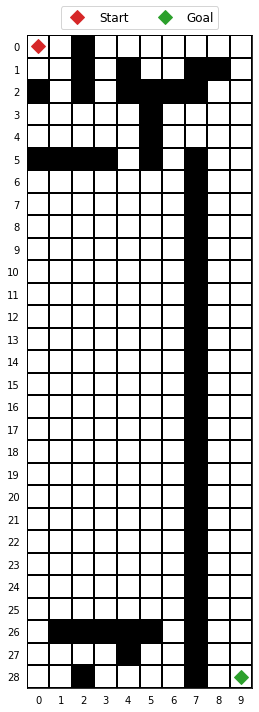

In [462]:
map = [[0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 2, 0, 0, 2, 2, 0],
        [2, 0, 2, 0, 2, 2, 2, 2, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [2, 2, 2, 2, 0, 2, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 2, 2, 2, 2, 2, 0, 2, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 2, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 2, 0, 1]]
grid_env = GridWorld(map)
maze = np.where(np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)) == 2, 1, np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)))
plt.figure(tight_layout=True)
im = plt.imshow(maze, aspect='equal', cmap="gray_r");
ax = plt.gca();
# Major ticks
ax.set_xticks(np.arange(0, len(maze[0]), 1));
ax.set_yticks(np.arange(0, len(maze), 1));
# Minor ticks
ax.set_xticks(np.arange(-.5, len(maze[0]), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(maze), 1), minor=True);
# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
start = grid_env.start_pos
goal = (np.where(np.array(grid_env.map) == 1.0)[0][0], np.where(np.array(grid_env.map) == 1.0)[1][0])
plt.plot(start[1], start[0], "D", color="tab:red", markersize=10)
plt.plot(goal[1], goal[0], "D", color="tab:green", markersize=10)
plt.plot([], [], "D", color="tab:red", markersize=10, label="Start")
plt.plot([], [], "D", color="tab:green", markersize=10, label="Goal")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), fontsize="large", ncol=2)

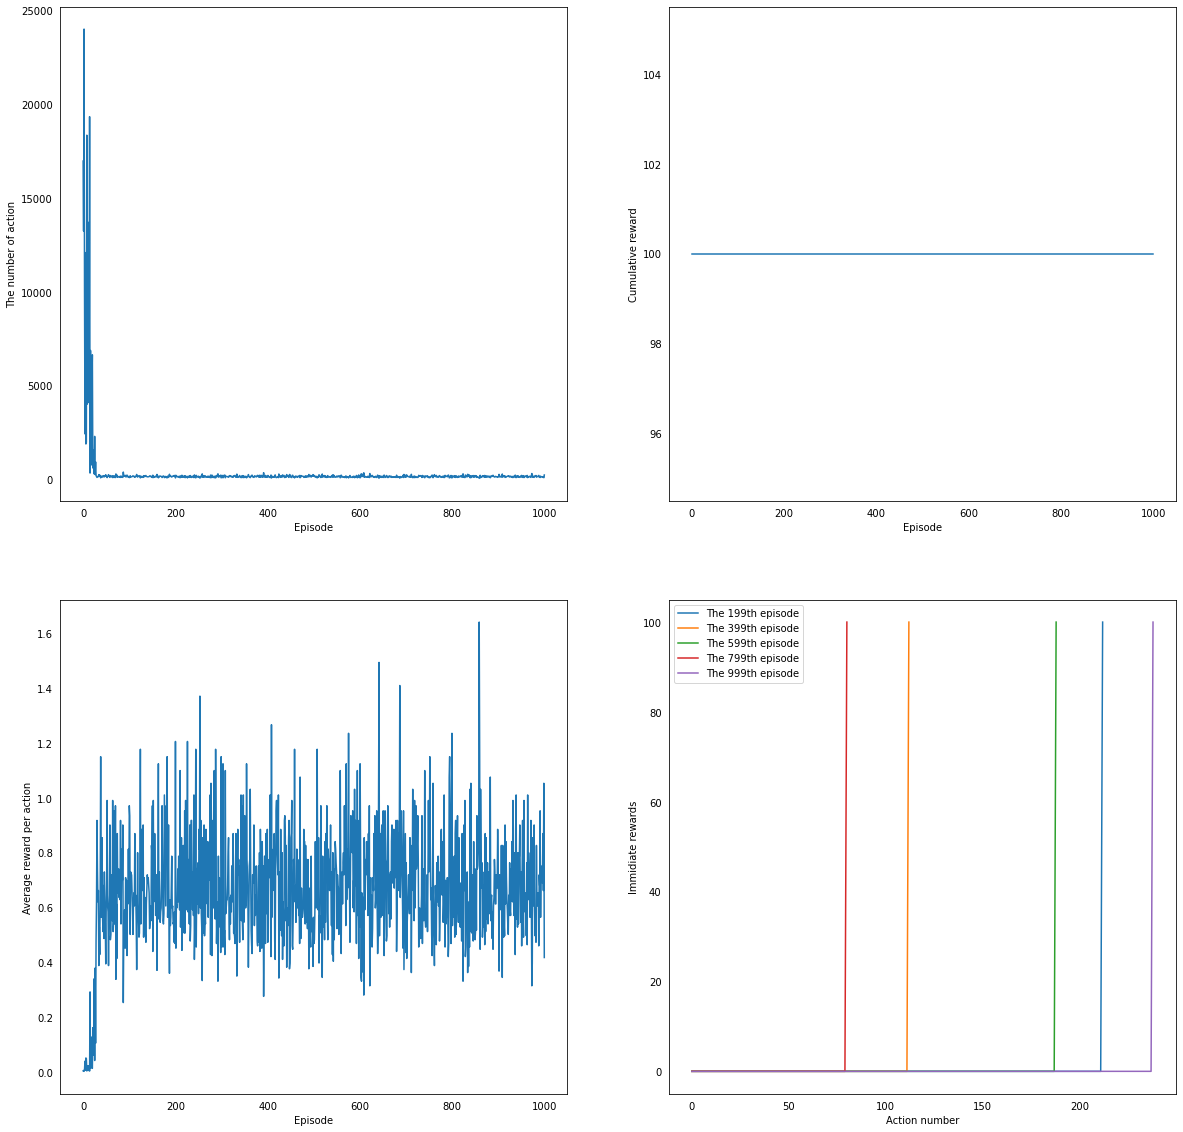

In [450]:
import numpy as np
import matplotlib.pyplot as plt

# 定数
NB_EPISODE = 1000    # エピソード数(記録の都合上5の倍数)
EPSILON = .7    # 探索率
ALPHA = .05      # 学習率
GAMMA = .90     # 割引率
ACTIONS = np.arange(4)  # 行動の集合
Result_V_values = {}
Record_number = 5   #最後のplotで用いる
Record_episode_numbers = np.array(range(int(NB_EPISODE / Record_number), NB_EPISODE+1, int(NB_EPISODE / Record_number))) - 1
#Record_episode_numbers = np.insert(Record_episode_numbers, 0, 0)
Record_episode_rewards = {}

if __name__ == '__main__':
    grid_env = GridWorld(map)  # grid worldの環境の初期化
    ini_state = grid_env.start_pos  # 初期状態（エージェントのスタート地点の位置）
    # エージェントの初期化
    agent = VLearningAgent(
        alpha=ALPHA,
        gamma=GAMMA,
        epsilon=EPSILON,  # 探索率
        actions=ACTIONS,   # 行動の集合
        observation=ini_state,
        grid_map = grid_env.map)  # Q学習エージェント
    rewards = []    # 評価用報酬の保存
    actions = []    # 評価用でそのエピソードの行動回数を保存
    is_end_episode = False  # エージェントがゴールしてるかどうか

    for episode in range(NB_EPISODE): #ゴールするまでが1エピソード
        episode_reward = []  # 1エピソードの累積報酬
        while(is_end_episode == False):    # ゴールするまで続ける
            #print("position:", grid_env.agent_pos)
            action_list = grid_env._is_possible_action_list()
            #print(len(action_list))
            action = agent.act(action_list)  # 行動選択
            state, reward, is_end_episode = grid_env.step(action)
            while(reward is None): #rewardがNoneならずっと回す
                action = agent.act(grid_env.agent_pos)  # 行動選択
                state, reward, is_end_episode = grid_env.step(action)
            agent.observe(state, reward)   # 状態と報酬の観測
            episode_reward.append(reward)
        if(episode in Record_episode_numbers):
            Record_episode_rewards[episode] = episode_reward
        rewards.append(np.sum(episode_reward))
        actions.append(len(episode_reward))
        state = grid_env.reset()  # 初期化
        agent.observe(state)    # エージェントを初期位置に
        is_end_episode = False
    Result_V_values = agent.v_values
    
#    print("v_values = state, v_value")
#    for state, v_value in Result_V_values.items():
#        print(state, v_value)
    
    # 結果のプロット
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    plt.plot(np.arange(NB_EPISODE), actions)
    plt.xlabel("Episode")
    plt.ylabel("The number of action")
    
    plt.subplot(2, 2, 2)
    plt.plot(np.arange(NB_EPISODE), rewards)
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    
    plt.subplot(2, 2, 3)
    plt.plot(np.arange(NB_EPISODE), np.array(rewards)/np.array(actions))
    plt.xlabel("Episode")
    plt.ylabel("Average reward per action")
    
    plt.subplot(2, 2, 4)
    for i, rewards in Record_episode_rewards.items():
        plt.plot(np.arange(len(rewards)), rewards, label="The " + str(i) + "th episode")
    plt.xlabel("Action number")
    plt.ylabel("Immidiate rewards")
    plt.legend()

##### 横軸をエピソード番号、縦軸を各エピソードにおける行動回数とした学習曲線

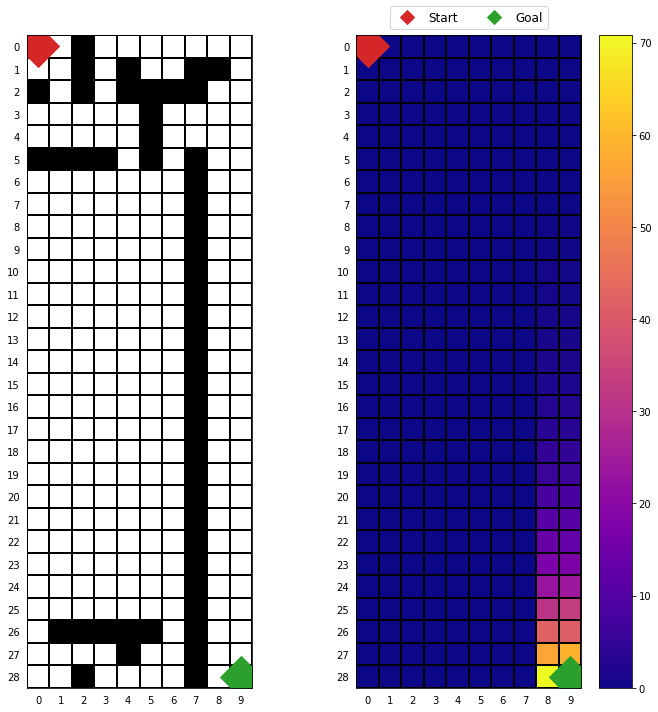

In [451]:
maze = np.where(np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)) == 2, 1, np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)))
V_map = np.zeros(len(grid_env.map[0])*len(grid_env.map)).reshape(len(grid_env.map), len(grid_env.map[0]))
for state, v_value in agent.v_values.items():
    state = state.replace("(", "")
    state = state.replace(")", "")
    state = state.split(",")
    pos = []
    for i in state:
        pos.append(int(i))
    x = pos[0]
    y = pos[1]
    if(np.isnan(v_value)):
        V_map[y][x] = 0
    else:
        V_map[y][x] = v_value
#plt.figure(figsize=(10, 10))
plt.figure(tight_layout=True)

plt.subplot(1, 2, 1)
im = plt.imshow(grid_env.map, aspect='equal', cmap="gray_r");
ax = plt.gca();
# Major ticks
ax.set_xticks(np.arange(0, len(maze[0]), 1));
ax.set_yticks(np.arange(0, len(maze), 1));
# Minor ticks
ax.set_xticks(np.arange(-.5, len(maze[0]), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(maze), 1), minor=True);
# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
start = grid_env.start_pos
goal = (np.where(np.array(grid_env.map) == 1.0)[0][0], np.where(np.array(grid_env.map) == 1.0)[1][0])
plt.plot(start[1], start[0], "D", color="tab:red", markersize=30)
plt.plot(goal[1], goal[0], "D", color="tab:green", markersize=30)

plt.subplot(1, 2, 2)
im = plt.imshow(V_map, aspect='equal', cmap="plasma");
plt.colorbar()
ax = plt.gca();
ax.set_xticks(np.arange(0, len(maze[0]), 1));
ax.set_yticks(np.arange(0, len(maze), 1));
ax.set_xticks(np.arange(-.5, len(maze[0]), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(maze), 1), minor=True);
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
start = grid_env.start_pos
goal = (np.where(np.array(grid_env.map) == 1.0)[0][0], np.where(np.array(grid_env.map) == 1.0)[1][0])
plt.plot(start[1], start[0], "D", color="tab:red", markersize=30)
plt.plot(goal[1], goal[0], "D", color="tab:green", markersize=30)
#ダミープロット(凡例で表示たい状態)
plt.plot([], [], "D", color="tab:red", markersize=10, label="Start")
plt.plot([], [], "D", color="tab:green", markersize=10, label="Goal")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), fontsize="large", ncol=2)

##### 各座標における状態価値をヒートマップで描画したもの(壁の状態価値=0,赤=start, 緑=goal)

##### 結果と考察
1. 結果
    - gamma=0.9, alpha=0.05, epsilon=0.1付近が最も学習が上手くいった
    - 上のヒートマップからわかるように、迷路の左下部分についてはあまり訪れなかったために0になってしまっている
    - これに関してはエピソード数=10000としても変化しなかった
2. 考察
    - epsilonはエージェントのこれまで学習したことへの信頼度に対応していると考えられる

- Q学習エージェントで実行、その結果

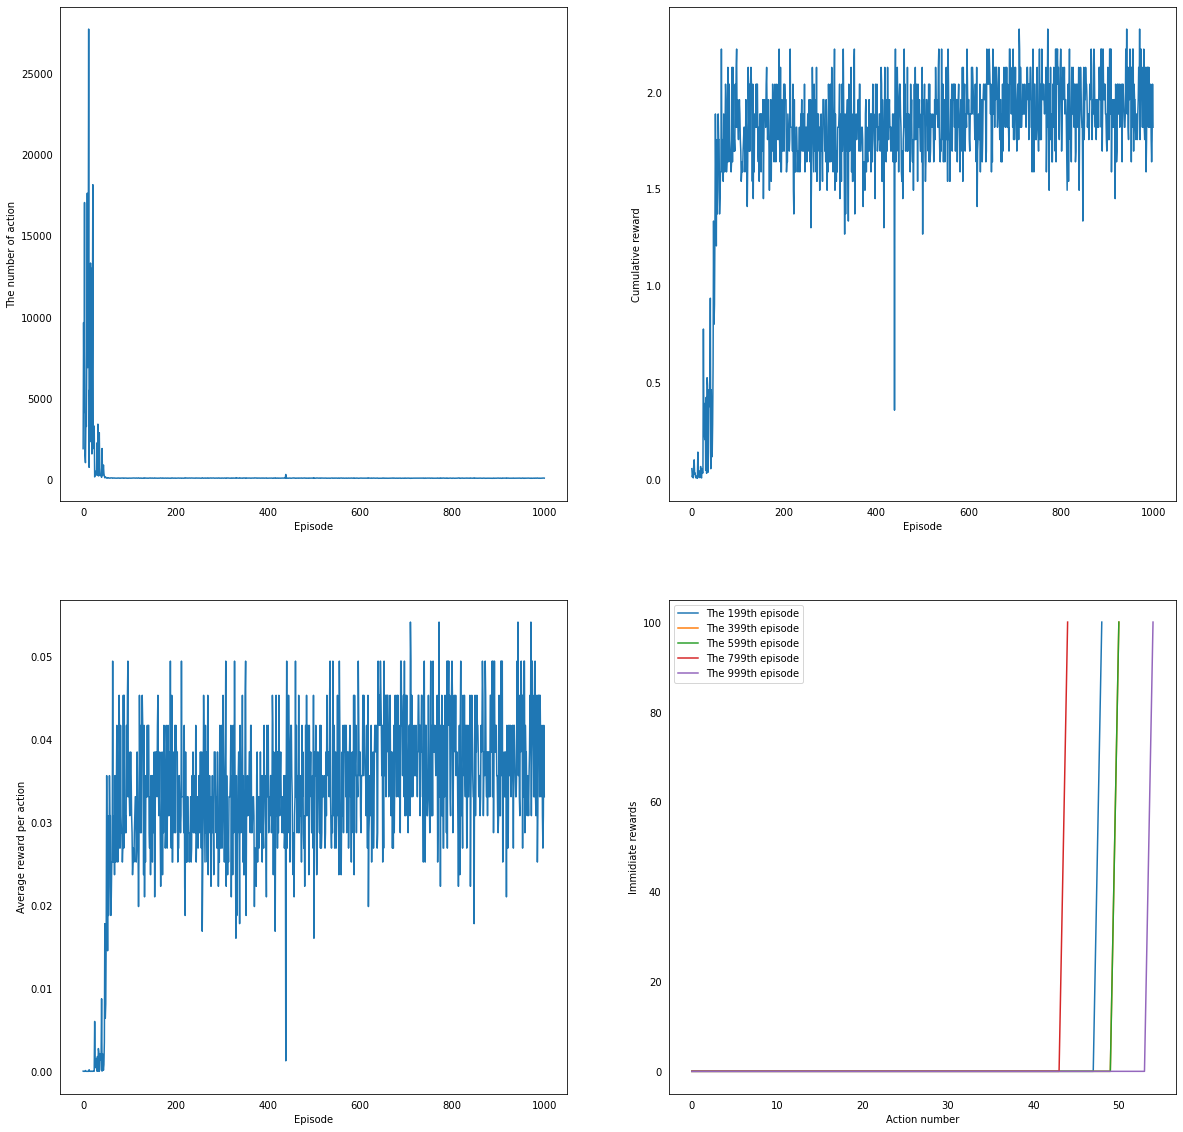

In [452]:
import numpy as np
import matplotlib.pyplot as plt

# 定数
NB_EPISODE = 1000    # エピソード数
EPSILON = .2    # 探索率
ALPHA = .3      # 学習率
GAMMA = .90     # 割引率
ACTIONS = np.arange(4)  # 行動の集合
Record_number = 5   #最後のplotで用いる
Record_episode_numbers = np.array(range(int(NB_EPISODE / Record_number), NB_EPISODE+1, int(NB_EPISODE / Record_number))) - 1
#Record_episode_numbers = np.insert(Record_episode_numbers, 0, 0)
Record_episode_rewards = {}
Result_Q_values = {}

if __name__ == '__main__':
    grid_env = GridWorld(map)  # grid worldの環境の初期化
    ini_state = grid_env.start_pos  # 初期状態（エージェントのスタート地点の位置）
    # エージェントの初期化
    agent = QLearningAgent(
        alpha=ALPHA,
        gamma=GAMMA,
        epsilon=EPSILON,  # 探索率
        actions=ACTIONS,   # 行動の集合
        observation=ini_state)  # Q学習エージェント
    rewards = []    # 評価用報酬の保存
    actions = []    # 評価用でそのエピソードの行動回数を保存
    is_end_episode = False  # エージェントがゴールしてるかどうか？

    # 実験
    for episode in range(NB_EPISODE): #ゴールするまでが1エピソード
        episode_reward = []  # 1エピソードの累積報酬
        while(is_end_episode == False):    # ゴールするまで続ける
            #print("position:", grid_env.agent_pos)
            action = agent.act()  # 行動選択
            state, reward, is_end_episode = grid_env.step(action)
            while(reward is None): #rewardがNoneならずっと回す
                agent.set_wall(action, state)
                action = agent.act()  # 行動選択
                state, reward, is_end_episode = grid_env.step(action)
            #print("Action!", action)
            #print("observe:", state, reward)
            agent.observe(state, reward)   # 状態と報酬の観測
            episode_reward.append(reward)
        #rewards.append(np.sum(episode_reward))  # このエピソードの平均報酬を与える
        if(episode in Record_episode_numbers):
            Record_episode_rewards[episode] = episode_reward
        rewards.append(np.sum(episode_reward) / len(episode_reward))
        actions.append(len(episode_reward))
        state = grid_env.reset()  # 初期化
        agent.observe(state)    # エージェントを初期位置に
        is_end_episode = False
    Result_Q_values = agent.q_values
    
#    print("q_values = state, q_value_list")
#    for state, q_list in Result_Q_values.items():
#        print(state, q_list)
    # 結果のプロット
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    plt.plot(np.arange(NB_EPISODE), actions)
    plt.xlabel("Episode")
    plt.ylabel("The number of action")
    
    plt.subplot(2, 2, 2)
    plt.plot(np.arange(NB_EPISODE), rewards)
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    
    plt.subplot(2, 2, 3)
    plt.plot(np.arange(NB_EPISODE), np.array(rewards)/np.array(actions))
    plt.xlabel("Episode")
    plt.ylabel("Average reward per action")
    
    plt.subplot(2, 2, 4)
    for i, rewards in Record_episode_rewards.items():
        plt.plot(np.arange(len(rewards)), rewards, label="The " + str(i) + "th episode")
    plt.xlabel("Action number")
    plt.ylabel("Immidiate rewards")
    plt.legend()

##### 横軸をエピソード番号、縦軸を各エピソードにおける行動回数とした学習曲線

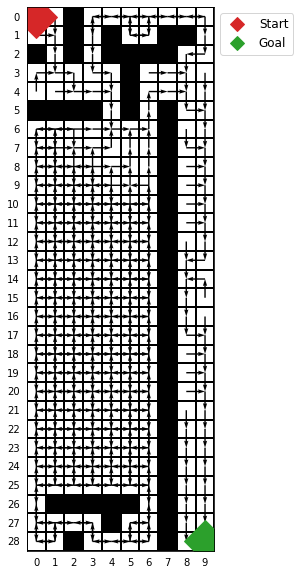

In [453]:
maze = np.where(np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)) == 2, 1, np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)))
def plot_arrow(x1, y1, action):
    p = (y1, x1)
    if(action == 0):
        q = (y1-1, x1)
    elif(action == 1):
        q = (y1+1, x1)
    elif(action == 2):
        q = (y1, x1-1)
    elif(action == 3):
        q = (y1, x1+1)
    plt.quiver(p[1], p[0], (q[1]-p[1]), (q[0]-p[0]), angles='xy', scale_units='xy', scale=1)

plt.figure(figsize=(10, 10))
im = plt.imshow(maze, aspect='equal', cmap="gray_r");
ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, len(maze[0]), 1));
ax.set_yticks(np.arange(0, len(maze), 1));

# Minor ticks
ax.set_xticks(np.arange(-.5, len(maze[0]), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(maze), 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
start = grid_env.start_pos
goal = (np.where(np.array(grid_env.map) == 1.0)[0][0], np.where(np.array(grid_env.map) == 1.0)[1][0])
plt.plot(start[1], start[0], "D", color="tab:red", markersize=30)
plt.plot(goal[1], goal[0], "D", color="tab:green", markersize=30)
#ダミープロット(凡例で表示たい状態)
plt.plot([], [], "D", color="tab:red", markersize=10, label="Start")
plt.plot([], [], "D", color="tab:green", markersize=10, label="Goal")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize="large")

#Q値からその場所での最適行動を記す
for position, q_list in Result_Q_values.items():
    position = position.replace("(", "")
    position = position.replace(")", "")
    position = position.split(",")
    pos = []
    for i in position:
        pos.append(int(i))
    x = pos[0]
    y = pos[1]
    index = np.where(q_list == np.nanmax(q_list))
    if(x == len(maze[0])-1 and y == len(maze)-1):
        continue
    elif(len(index[0]) == 1):
        plot_arrow(x, y, index[0][0])
    elif(len(index[0]) > 1):
        for i in index[0]:
            plot_arrow(x, y, i)
    else:
        continue

##### 各座標における最大の行動価値を持つ方向を矢印で描画したもの(もしそのような値の価値を複数持つ場合にはその全ての方向を描画してある)

##### 結果と考察
1. 結果
    - gamma=0.9, alpha=0.3, epsilon=0.2付近が最も学習が上手くいった
    - 学習曲線から分かるようにV学習を行うエージェントよりはるかに上手く学習ができている
    - 上の矢印の図から分かるように、迷路の左下部分についてはあまり訪れなかったために各行動(上下左右)の価値=0になってしまっているため一つの座標に複数の矢印が描画されている
    - これに関してはエピソード数=10000としてもあまり変化しなかったが、たまに最初の行動で下に進んだ場合にはそうではなくなる
2. 考察
    - epsilonはエージェントのこれまで学習したことへの信頼度に対応していると考えられる

## 3. その他自分で考えた迷路データを用いた学習とその結果

- 壁が全くない迷路(上と同様V学習、Q学習それぞれの結果を示してある)

In [454]:
map = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
grid_env = GridWorld(map)
grid_env.start_pos = (0, 0)   # エージェントのスタート地点(x, y) ()なしでもタプルと判定される        

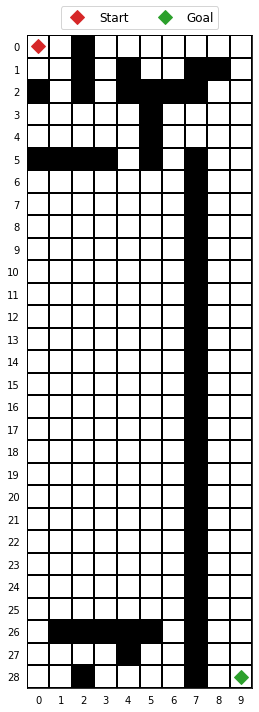

In [463]:
maze = np.where(np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)) == 2, 1, np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)))
plt.figure(tight_layout=True)
im = plt.imshow(maze, aspect='equal', cmap="gray_r");
ax = plt.gca();
# Major ticks
ax.set_xticks(np.arange(0, len(maze[0]), 1));
ax.set_yticks(np.arange(0, len(maze), 1));
# Minor ticks
ax.set_xticks(np.arange(-.5, len(maze[0]), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(maze), 1), minor=True);
# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
start = grid_env.start_pos
goal = (np.where(np.array(grid_env.map) == 1.0)[0][0], np.where(np.array(grid_env.map) == 1.0)[1][0])
plt.plot(start[1], start[0], "D", color="tab:red", markersize=10)
plt.plot(goal[1], goal[0], "D", color="tab:green", markersize=10)
plt.plot([], [], "D", color="tab:red", markersize=10, label="Start")
plt.plot([], [], "D", color="tab:green", markersize=10, label="Goal")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), fontsize="large", ncol=2)

- V学習の結果

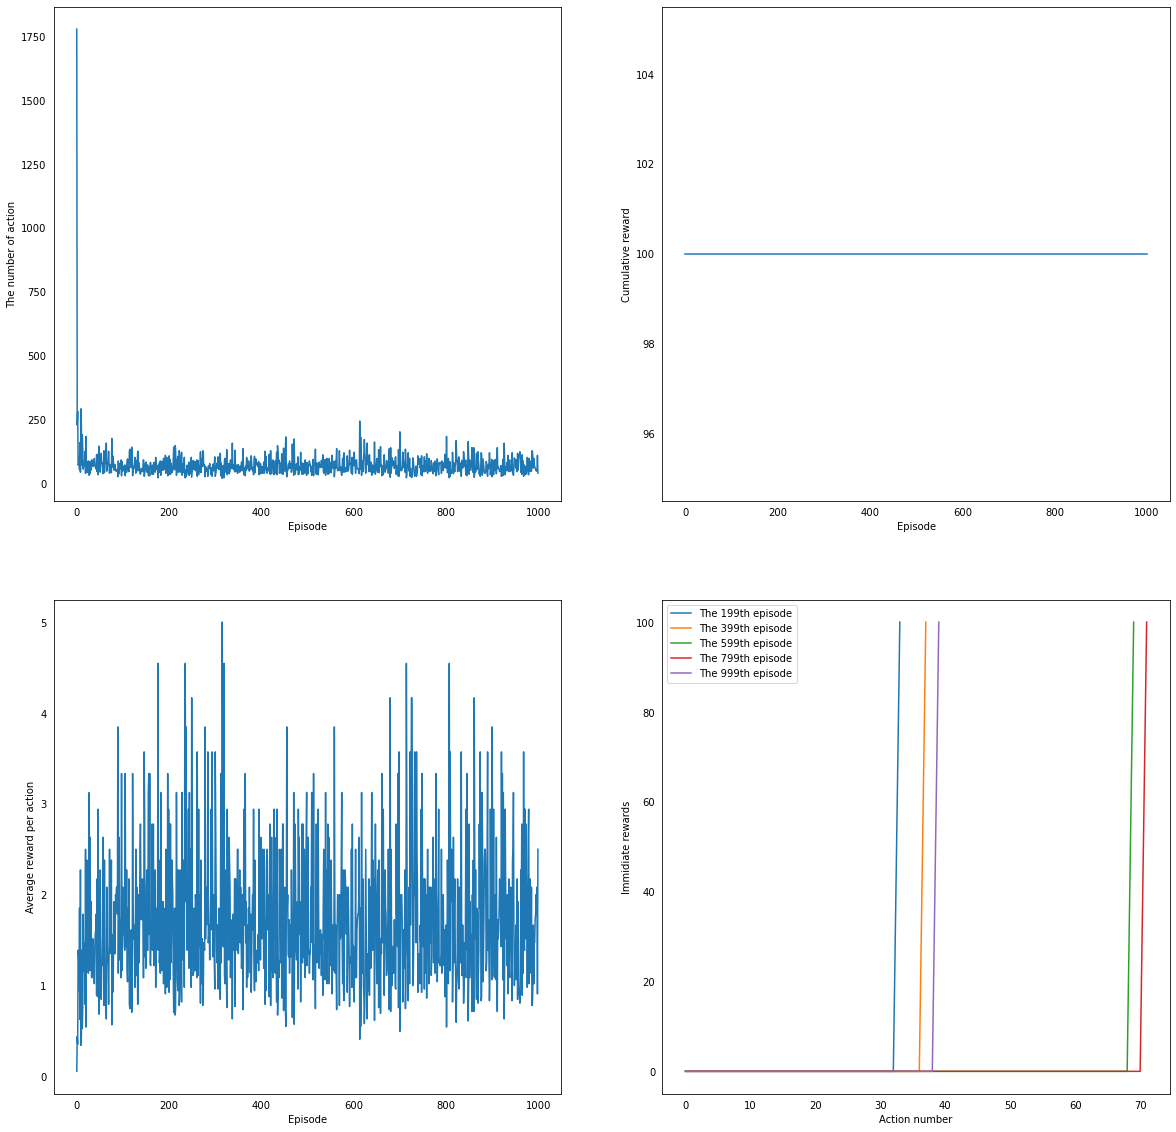

In [457]:
import numpy as np
import matplotlib.pyplot as plt

# 定数
NB_EPISODE = 1000    # エピソード数
EPSILON = .7    # 探索率
ALPHA = .05      # 学習率
GAMMA = .90     # 割引率
ACTIONS = np.arange(4)  # 行動の集合
Record_number = 5   #最後のplotで用いる
Record_episode_numbers = np.array(range(int(NB_EPISODE / Record_number), NB_EPISODE+1, int(NB_EPISODE / Record_number))) - 1
#Record_episode_numbers = np.insert(Record_episode_numbers, 0, 0)
Record_episode_rewards = {}
Result_V_values = {}

if __name__ == '__main__':
    grid_env = GridWorld(map)  # grid worldの環境の初期化
    ini_state = grid_env.start_pos  # 初期状態（エージェントのスタート地点の位置）
    # エージェントの初期化
    agent = VLearningAgent(
        alpha=ALPHA,
        gamma=GAMMA,
        epsilon=EPSILON,  # 探索率
        actions=ACTIONS,   # 行動の集合
        observation=ini_state,
        grid_map = grid_env.map)  # Q学習エージェント
    rewards = []    # 評価用報酬の保存
    actions = []    # 評価用でそのエピソードの行動回数を保存
    is_end_episode = False  # エージェントがゴールしてるかどうか

    for episode in range(NB_EPISODE): #ゴールするまでが1エピソード
        episode_reward = []  # 1エピソードの累積報酬
        while(is_end_episode == False):    # ゴールするまで続ける
            #print("position:", grid_env.agent_pos)
            action_list = grid_env._is_possible_action_list()
            #print(len(action_list))
            action = agent.act(action_list)  # 行動選択
            state, reward, is_end_episode = grid_env.step(action)
            while(reward is None): #rewardがNoneならずっと回す
                action = agent.act(grid_env.agent_pos)  # 行動選択
                state, reward, is_end_episode = grid_env.step(action)
            agent.observe(state, reward)   # 状態と報酬の観測
            episode_reward.append(reward)   
        rewards.append(np.sum(episode_reward))
        if(episode in Record_episode_numbers):
            Record_episode_rewards[episode] = episode_reward
        actions.append(len(episode_reward))   # そのエピソードにおける行動回数
        state = grid_env.reset()  # 初期化
        agent.observe(state)    # エージェントを初期位置に
        is_end_episode = False
    Result_V_values = agent.v_values
    
#    print("v_values = state, v_value")
#    for state, v_value in Result_V_values.items():
#        print(state, v_value)
    
    # 結果のプロット
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    plt.plot(np.arange(NB_EPISODE), actions)
    plt.xlabel("Episode")
    plt.ylabel("The number of action")
    
    plt.subplot(2, 2, 2)
    plt.plot(np.arange(NB_EPISODE), rewards)
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    
    plt.subplot(2, 2, 3)
    plt.plot(np.arange(NB_EPISODE), np.array(rewards)/np.array(actions))
    plt.xlabel("Episode")
    plt.ylabel("Average reward per action")
    
    plt.subplot(2, 2, 4)
    for i, rewards in Record_episode_rewards.items():
        plt.plot(np.arange(len(rewards)), rewards, label="The " + str(i) + "th episode")
    plt.xlabel("Action number")
    plt.ylabel("Immidiate rewards")
    plt.legend()

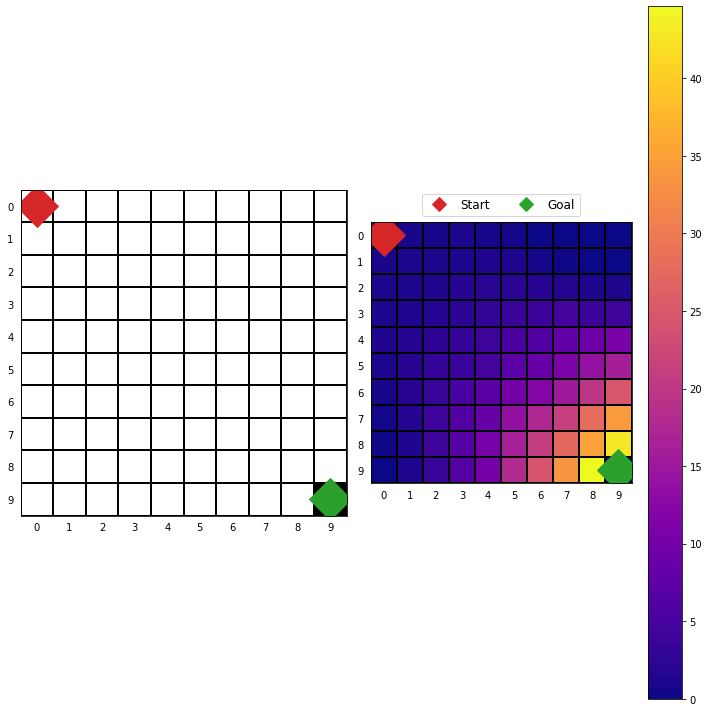

In [458]:
maze = np.where(np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)) == 2, 1, np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)))
V_map = np.zeros(len(grid_env.map[0])*len(grid_env.map)).reshape(len(grid_env.map), len(grid_env.map[0]))
for state, v_value in agent.v_values.items():
    state = state.replace("(", "")
    state = state.replace(")", "")
    state = state.split(",")
    pos = []
    for i in state:
        pos.append(int(i))
    x = pos[0]
    y = pos[1]
    if(np.isnan(v_value)):
        V_map[y][x] = 0
    else:
        V_map[y][x] = v_value

plt.figure(tight_layout=True)

plt.subplot(1, 2, 1)
im = plt.imshow(grid_env.map, aspect='equal', cmap="gray_r");
ax = plt.gca();
# Major ticks
ax.set_xticks(np.arange(0, len(maze[0]), 1));
ax.set_yticks(np.arange(0, len(maze), 1));
# Minor ticks
ax.set_xticks(np.arange(-.5, len(maze[0]), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(maze), 1), minor=True);
# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
start = grid_env.start_pos
goal = (np.where(np.array(grid_env.map) == 1.0)[0][0], np.where(np.array(grid_env.map) == 1.0)[1][0])
plt.plot(start[1], start[0], "D", color="tab:red", markersize=30)
plt.plot(goal[1], goal[0], "D", color="tab:green", markersize=30)

plt.subplot(1, 2, 2)
im = plt.imshow(V_map, aspect='equal', cmap="plasma");
plt.colorbar()
ax = plt.gca();
ax.set_xticks(np.arange(0, len(maze[0]), 1));
ax.set_yticks(np.arange(0, len(maze), 1));
ax.set_xticks(np.arange(-.5, len(maze[0]), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(maze), 1), minor=True);
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
start = grid_env.start_pos
goal = (np.where(np.array(grid_env.map) == 1.0)[0][0], np.where(np.array(grid_env.map) == 1.0)[1][0])
plt.plot(start[1], start[0], "D", color="tab:red", markersize=30)
plt.plot(goal[1], goal[0], "D", color="tab:green", markersize=30)
#ダミープロット(凡例で表示たい状態)
plt.plot([], [], "D", color="tab:red", markersize=10, label="Start")
plt.plot([], [], "D", color="tab:green", markersize=10, label="Goal")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), fontsize="large", ncol=2)

- Q学習の結果 

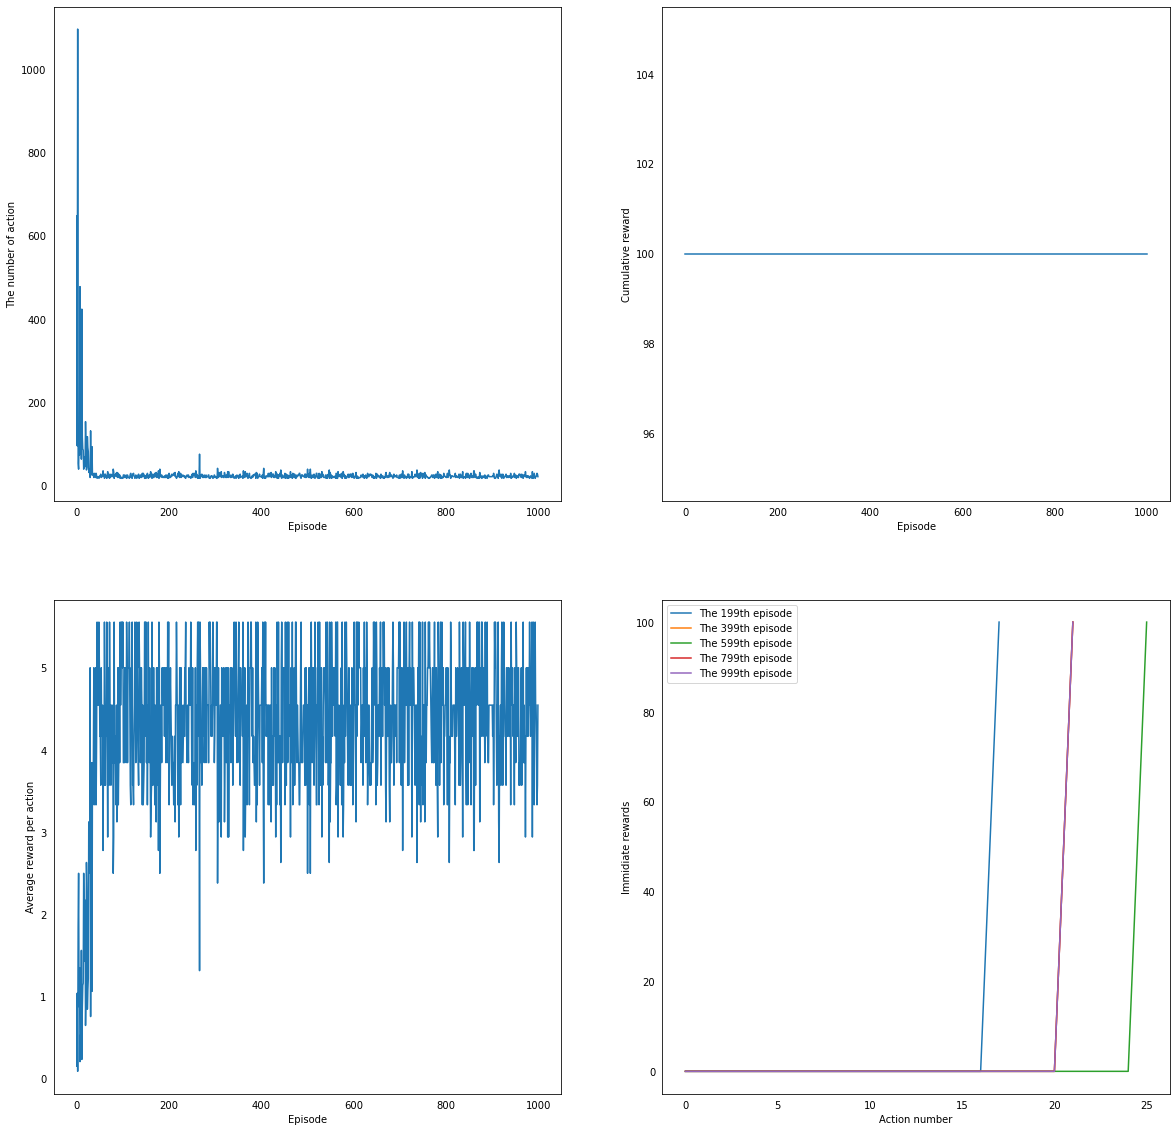

In [459]:
import numpy as np
import matplotlib.pyplot as plt

# 定数
NB_EPISODE = 1000    # エピソード数
EPSILON = .2    # 探索率
ALPHA = .3      # 学習率
GAMMA = .90     # 割引率
ACTIONS = np.arange(4)  # 行動の集合
Record_number = 5   #最後のplotで用いる
Record_episode_numbers = np.array(range(int(NB_EPISODE / Record_number), NB_EPISODE+1, int(NB_EPISODE / Record_number))) - 1
#Record_episode_numbers = np.insert(Record_episode_numbers, 0, 0)
Record_episode_rewards = {}
Result_Q_values = {}

if __name__ == '__main__':
    grid_env = GridWorld(map)  # grid worldの環境の初期化
    ini_state = grid_env.start_pos  # 初期状態（エージェントのスタート地点の位置）
    # エージェントの初期化
    agent = QLearningAgent(
        alpha=ALPHA,
        gamma=GAMMA,
        epsilon=EPSILON,  # 探索率
        actions=ACTIONS,   # 行動の集合
        observation=ini_state)  # Q学習エージェント
    rewards = []    # 評価用報酬の保存
    actions = []    # 評価用でそのエピソードの行動回数を保存
    is_end_episode = False  # エージェントがゴールしてるかどうか？

    # 実験
    for episode in range(NB_EPISODE): #ゴールするまでが1エピソード
        episode_reward = []  # 1エピソードの累積報酬
        while(is_end_episode == False):    # ゴールするまで続ける
            #print("position:", grid_env.agent_pos)
            action = agent.act()  # 行動選択
            state, reward, is_end_episode = grid_env.step(action)
            while(reward is None): #rewardがNoneならずっと回す
                agent.set_wall(action, state)
                action = agent.act()  # 行動選択
                state, reward, is_end_episode = grid_env.step(action)
            #print("Action!", action)
            #print("observe:", state, reward)
            agent.observe(state, reward)   # 状態と報酬の観測
            episode_reward.append(reward)
        #rewards.append(np.sum(episode_reward))  # このエピソードの平均報酬を与える
        if(episode in Record_episode_numbers):
            Record_episode_rewards[episode] = episode_reward
        rewards.append(np.sum(episode_reward))
        actions.append(len(episode_reward))
        state = grid_env.reset()  # 初期化
        agent.observe(state)    # エージェントを初期位置に
        is_end_episode = False
    Result_Q_values = agent.q_values
    # 結果のプロット
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    plt.plot(np.arange(NB_EPISODE), actions)
    plt.xlabel("Episode")
    plt.ylabel("The number of action")
    
    plt.subplot(2, 2, 2)
    plt.plot(np.arange(NB_EPISODE), rewards)
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    
    plt.subplot(2, 2, 3)
    plt.plot(np.arange(NB_EPISODE), np.array(rewards)/np.array(actions))
    plt.xlabel("Episode")
    plt.ylabel("Average reward per action")
    
    plt.subplot(2, 2, 4)
    for i, rewards in Record_episode_rewards.items():
        plt.plot(np.arange(len(rewards)), rewards, label="The " + str(i) + "th episode")
    plt.xlabel("Action number")
    plt.ylabel("Immidiate rewards")
    plt.legend()

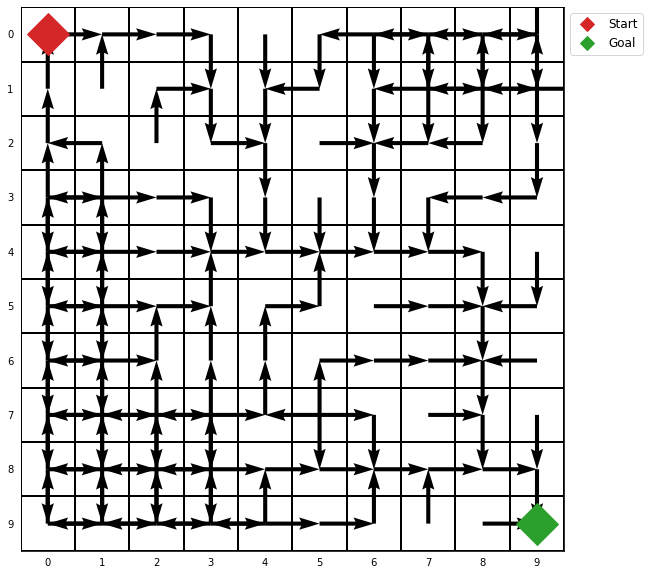

In [460]:
maze = np.where(np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)) == 2, 1, np.where(np.array(grid_env.map) == 1, 0, np.array(grid_env.map)))
def plot_arrow(x1, y1, action):
    p = (y1, x1)
    if(action == 0):
        q = (y1-1, x1)
    elif(action == 1):
        q = (y1+1, x1)
    elif(action == 2):
        q = (y1, x1-1)
    elif(action == 3):
        q = (y1, x1+1)
    plt.quiver(p[1], p[0], (q[1]-p[1]), (q[0]-p[0]), angles='xy', scale_units='xy', scale=1)

plt.figure(figsize=(10, 10))
im = plt.imshow(maze, aspect='equal', cmap="gray_r");
ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, len(maze[0]), 1));
ax.set_yticks(np.arange(0, len(maze), 1));

# Minor ticks
ax.set_xticks(np.arange(-.5, len(maze[0]), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(maze), 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
start = grid_env.start_pos
goal = (np.where(np.array(grid_env.map) == 1.0)[0][0], np.where(np.array(grid_env.map) == 1.0)[1][0])
plt.plot(start[1], start[0], "D", color="tab:red", markersize=30)
plt.plot(goal[1], goal[0], "D", color="tab:green", markersize=30)
#ダミープロット(凡例で表示たい状態)
plt.plot([], [], "D", color="tab:red", markersize=10, label="Start")
plt.plot([], [], "D", color="tab:green", markersize=10, label="Goal")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize="large")

#Q値からその場所での最適行動を記す
for position, q_list in Result_Q_values.items():
    position = position.replace("(", "")
    position = position.replace(")", "")
    position = position.split(",")
    pos = []
    for i in position:
        pos.append(int(i))
    x = pos[0]
    y = pos[1]
    index = np.where(q_list == np.nanmax(q_list))
    if(x == len(maze[0])-1 and y == len(maze)-1):
        continue
    elif(len(index[0]) == 1):
        plot_arrow(x, y, index[0][0])
    elif(len(index[0]) > 1):
        for i in index[0]:
            plot_arrow(x, y, i)
    else:
        continue

## 4. 努力と独創性
  - 外壁(問題の迷路における最も外側の外周壁)をいちいち入力するのは面倒だと感じたため、エージェントの行動先の座標が[0, 9]の外側に出た場合には自動でそこには壁があると判定できるようにしてある
  - 本課題では可視化するところに重きを置きを置いている(ヒートマップや各座標での最大価値を持つ行動の描画など)

## 5. Reference
実装に当たっては以下のページを参考にした
> [【入門】Q学習の解説とpythonでの実装 〜シンプルな迷路問題を例に〜](https://www.tcom242242.net/entry/ai-2/%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92/%E3%80%90%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%E3%80%81%E5%85%A5%E9%96%80%E3%80%91q%E5%AD%A6%E7%BF%92_%E8%BF%B7%E8%B7%AF%E3%82%92%E4%BE%8B%E3%81%AB/#toc1)

## 6. 講義の感想
 - ある程度強化学習について知識がある状態で参加していたが、厳密な数学的証明などはしたことがなかったのでとても有意義だった